# Laboratorio 1

## Desarrollo de una herramienta analítica usando recursos nativos de Python

Para el desarrollo de esta actividad debes utilizar únicamente recursos nativos de Python (puedes usar librerías como `math` y `random`). Está prohibido el uso de librerías externas, a excepción de `matplotlib`. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

En algunas de las misiones encontrarás: una **versión base**, la cual indica el requerimiento mínimo de la misión; una **versión completa**, la cual indica mejoras deseables o complementos a la **versión base**. Un desarrollo aceptable del laboratorio debe satisfacer la **versión base** y un desarrollo correcto del laboratorio debe satisfacer la **versión completa**. Cumplir con el desarrollo de la **versión completa** desde un inicio hará más sencillas las misiones siguientes.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos en estructuras de Python.
3. Crear y llamar funciones.
4. Implementar condicionales diferenciando `if`, `elif` y `else`.
5. Implementar ciclos diferenciando el propósito de `for` y `while`.

## Contexto: exploración del potencial para asignar becas Unialpes

La Universidad ean se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Becas para los Mejores, entre otros, han sido revolucionarios al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades más prestigiosas del país.

Actualmente, la universidad quiere evaluar el potencial impacto que tendrían algunos programas de acción afirmativa para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas a personas interesadas en becas. Se cuenta con información respecto a la edad, género, estado civil, estrato socioeconómico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas encuestadas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar a los beneficiarios de las becas. Puntualmente, se espera que, para distintas reglas de selección (ej., pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca una caracterización de los potenciales beneficiarios de las becas (a partir de estadísticas descriptivas y visualizaciones), de forma que exista un sustento para elegir la regla de selección adecuada.

## Fase 1: obtener e inspeccionar archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo y, por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano (`.txt`). Cada archivo corresponde a uno de los atributos antes mencionados y están estructurados de forma que todos relacionan a las personas encuestadas en el mismo orden (i.e., en cada archivo la primera línea corresponde a un dato de la primera persona encuestada, la segunda línea corresponde a un dato de la segunda persona encuestada, etc.).

Los archivos con los que cuentas son:

* `"edad.txt"`: un archivo con la edad de cada persona encuestada;
* `"escolaridad.txt"`: un archivo con el nivel de escolaridad de cada persona encuestada;
* `"estado_civil.txt"`: un archivo con el estado civil de cada persona encuestada;
* `"estrato.txt"`: un archivo con el estrato socioeconómico de cada persona encuestada;
* `"genero.txt"`: un archivo con el género de cada persona encuestada;
* `"promedio.txt"`: un archivo con el promedio académico de cada persona encuestada;
* `"region.txt"`: un archivo con la región de proveniencia de cada persona encuestada.

### Misión 1

**Versión base**: utiliza métodos de lectura de archivos para guardar la información de cada archivo en una estructura de datos de Python, de manera que se respete el orden y la categoría de los datos.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** y llámala dentro de un ciclo para automatizar la lectura de los archivos.

In [128]:
# importing packages
import pandas as pd
import numpy as np
import glob
def crear_dataframe(ruta):
    file_list = glob.glob(ruta + "/*.txt")
    main_dataframe = pd.DataFrame(pd.read_csv(file_list[0]))
    for i in range(1,len(file_list)):
        data = pd.read_csv(file_list[i])
        df = pd.DataFrame(data)
        main_dataframe = pd.concat([main_dataframe,df],axis=1)
    fila0=pd.DataFrame(main_dataframe.columns).transpose()
    main_dataframe.columns = [0, 1, 2, 3, 4, 5 ,6]
    df=pd.concat([main_dataframe,fila0])
    df.columns=["edad","escolaridad","estado_civil","estrato","genero","promedio","region"]
    return df

df=crear_dataframe('Archivos')
df

,edad,escolaridad,estado_civil,estrato,genero,promedio,region
0,66,Profesional,divorciada,1,masculino,0.9,Region_1
1,24,Secundaria,divorciada,3,femenino,3.2,Region_2
2,55,Secundaria,casada,3,masculino,2.1,Region_2
3,26,Secundaria,divorciada,2,otro,2.1,Region_3
4,69,Secundaria,divorciada,3,no binario,2.0,Region_4
...,...,...,...,...,...,...,...
495,24,Secundaria,viuda,1,femenino,2.9,Region_1
496,50,Profesional,casada,1,no binario,2.1,Region_1
497,54,Secundaria,divorciada,2,femenino,2.7,Region_1
498,66,Secundaria,casada,2,femenino,3.0,Region_2


### Misión 2

**Versión base**: calcula estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable relevante en el contexto del problema y repórtalas concluyendo acerca de las principales características de los datos.

**Versión completa**: complementa la **versión base** con visualizaciones informativas sobre los datos (ej., histogramas, gráficos de dispersión, boxplots, etc.), relevantes para el problema.

In [132]:
# Implementa tu respuesta en esta celda
Profesional=df[df["escolaridad"]=="Profesional"]["promedio"]
Maestria=df[df["escolaridad"]=="Maestria"]["promedio"]
Secundaria=df[df["escolaridad"]=="Secundaria"]["promedio"].astype(float)
Numero=df.groupby(["escolaridad"]).count()
Region=df.groupby(["region"]).count()

print("Numero de filas:",len(df))
print("Las personas con titulo profesional son: ", Numero.iloc[2,0], ",tienen un promedio de: ", round(Profesional.mean(), 3),",una mediana de: ",round(Profesional.median(), 3), ",una varianza de : ",round(Profesional.var(0), 3), "y una desviacion de: ",round(Profesional.std(0), 3) )
print("Las personas con titulo de maestria son: ", Numero.iloc[0,0], ",tienen un promedio de: ", round(Maestria.mean(), 3),",una mediana de: ",round(Maestria.median(), 3), ",una varianza de : ",round(Maestria.var(0), 3), "y una desviacion de: ",round(Maestria.std(0), 3) )
print("Las personas con titulo de secundaria son: ", Numero.iloc[3,0], ",tienen un promedio de: ", round(Secundaria.mean(), 3),",una mediana de: ",round(Secundaria.median(), 3), ",una varianza de : ",round(Secundaria.var(0), 3), "y una desviacion de: ",round(Secundaria.std(0), 3) )
print("Hay", Region.iloc[0,0],"personas de la region_1, hay ",Region.iloc[1,0] ,"personas de la region_2, hay ",Region.iloc[2,0], "personas de la region_3, hay ",Region.iloc[3,0],"personas de la region_4, hay ",Region.iloc[4,0]," personas de la region_5")

Numero de filas: 500
Las personas con titulo profesional son:  117 ,tienen un promedio de:  2.697 ,una mediana de:  3.0 ,una varianza de :  1.434 y una desviacion de:  1.198
Las personas con titulo de maestria son:  15 ,tienen un promedio de:  2.847 ,una mediana de:  3.0 ,una varianza de :  0.753 y una desviacion de:  0.868
Las personas con titulo de secundaria son:  343 ,tienen un promedio de:  2.595 ,una mediana de:  2.7 ,una varianza de :  1.204 y una desviacion de:  1.097
Hay 142 personas de la region_1, hay  117 personas de la region_2, hay  33 personas de la region_3, hay  193 personas de la region_4, hay  15  personas de la region_5


<AxesSubplot: xlabel='edad', ylabel='promedio'>

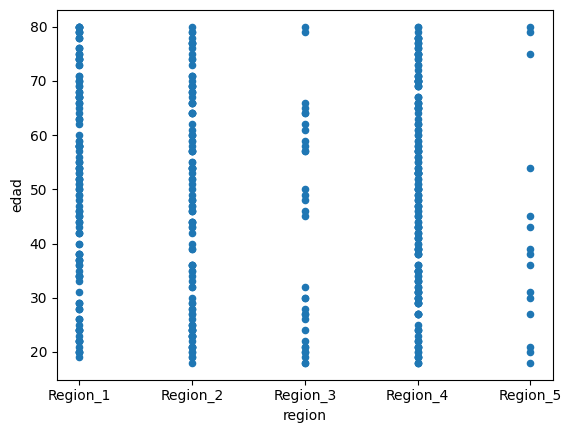

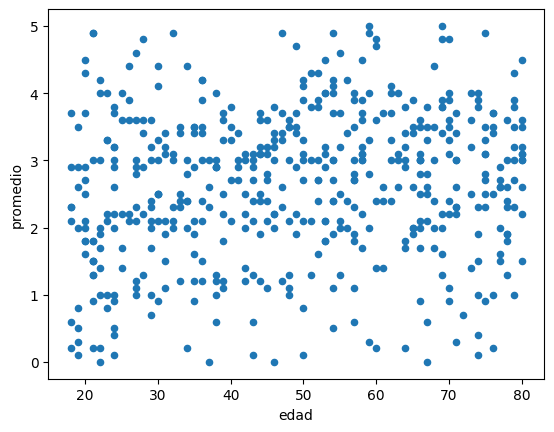

In [129]:
import matplotlib.pyplot as plt
df.plot( "region","edad", kind="scatter")
df.plot( "edad","promedio", kind="scatter")


Text(0, 0.5, 'densidad')

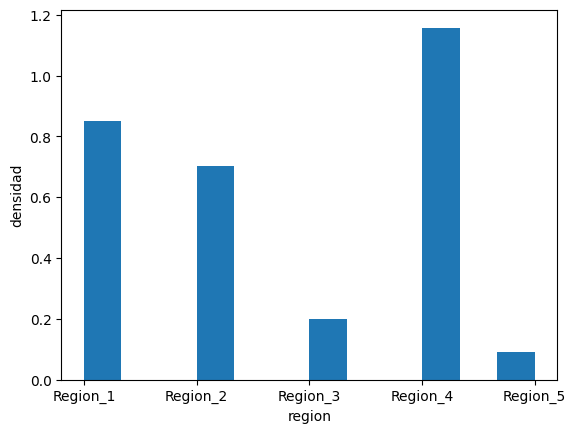

In [130]:
plt.hist(df["region"], bins=12, density=True)
plt.xlabel('region')
plt.ylabel('densidad')

(array([0.936, 0.   , 0.   , 0.   , 2.744, 0.   , 0.   , 0.   , 0.2  ,
        0.   , 0.   , 0.12 ]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  ]),
 <BarContainer object of 12 artists>)

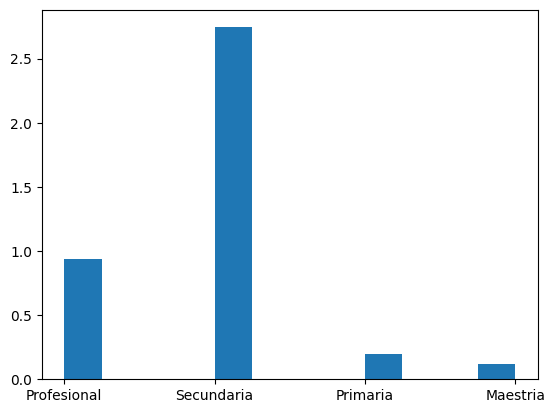

In [131]:
plt.hist(df["escolaridad"], bins=12, density=True)

## Referencias

* Discriminación Positiva<br>
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Diego Alejandro Cely Gómez.
 
__Fecha última actualización__: 11/07/2022